
## Step 1: Import Necessary Libraries

In [10]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Setting dark mode for plots
plt.style.use('dark_background')
sns.set_palette("deep")

## Step 2: Load the Dataset

In [11]:
# Loading the dataset
# Replace the file path with the correct one if necessary
dados = pd.read_excel('/Users/fabicampanari/Desktop/class_6-Lasso Regression/project_6-Lasso-Roidge-Elastic-Regression/Imoveis (1).xlsx')

# Displaying the first few rows of the dataset
print(dados.head())

   Valor  Área  Idade  Energia
0     69    96     14      170
1    176   145      8      144
2    195   175      2      147
3     80   101      4      160
4    390   233      2      220


## Step 3: Preprocess the Data


In [12]:
# Separating predictors (X) and the target variable (y)
X = dados.drop(columns=['Valor'])  # Replace 'Value' with the actual column name for the target variable
y = dados['Valor']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the predictors
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Lasso Regression

In [14]:
# Fitting a Lasso Regression model
lasso = Lasso(alpha=0.1, random_state=42)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train)

# Making predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Evaluating the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Printing results
print(f"Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}")

Lasso Regression - MSE: 1096.4149472055483, R2: 0.1364431558259771


## Step 5: Ridge Regression

In [16]:
# Fitting a Ridge Regression model
ridge = Ridge(alpha=0.1, random_state=42)  # Adjust alpha as needed
ridge.fit(X_train_scaled, y_train)

# Making predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Evaluating the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Printing results
print(f"Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}")

Ridge Regression - MSE: 1101.0884779199328, R2: 0.13276219594381689


## Step 6: Elastic Net Regression

In [18]:
# Fitting an Elastic Net model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)  # Adjust alpha and l1_ratio as needed
elastic_net.fit(X_train_scaled, y_train)

# Making predictions
y_pred_elastic = elastic_net.predict(X_test_scaled)

# Evaluating the model
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

# Printing results
print(f"Elastic Net Regression - MSE: {mse_elastic}, R2: {r2_elastic}")

Elastic Net Regression - MSE: 1030.9569813309065, R2: 0.18799906956176393


## Step 7: Compare Results

In [19]:
# Comparing the results of the three models
results = pd.DataFrame({
    'Model': ['Lasso', 'Ridge', 'Elastic Net'],
    'MSE': [mse_lasso, mse_ridge, mse_elastic],
    'R2': [r2_lasso, r2_ridge, r2_elastic]
})

print(results)

         Model          MSE        R2
0        Lasso  1096.414947  0.136443
1        Ridge  1101.088478  0.132762
2  Elastic Net  1030.956981  0.187999


## Step 8: Visualize Results

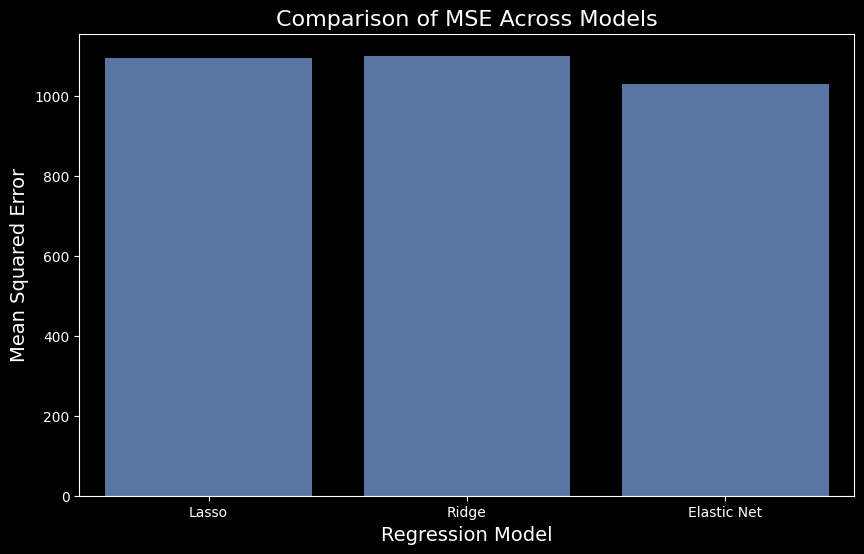

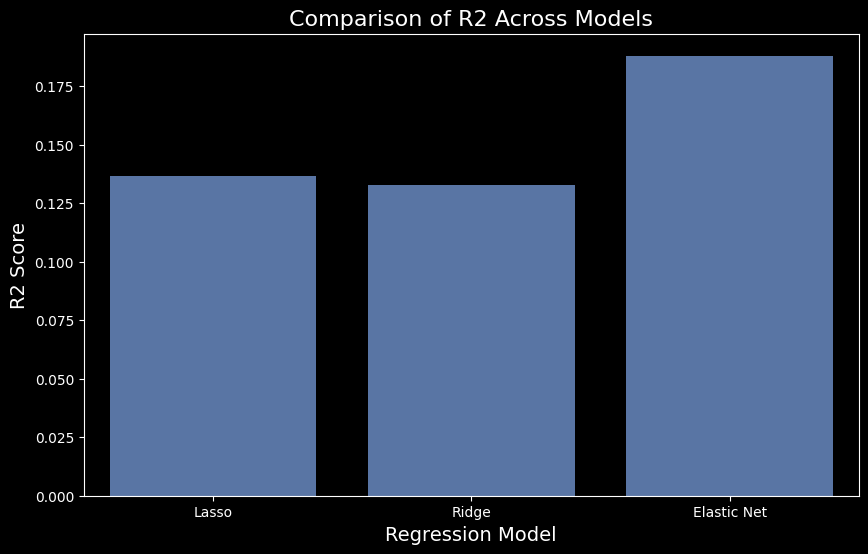

In [20]:
# Plotting the comparison of MSE
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results)
plt.title('Comparison of MSE Across Models', fontsize=16)
plt.xlabel('Regression Model', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.show()

# Plotting the comparison of R2
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results)
plt.title('Comparison of R2 Across Models', fontsize=16)
plt.xlabel('Regression Model', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.show()